## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [2]:
#Importar las bibliotecas necesarias 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
#Cargar los datos 
file_path = 'heart_cleveland_upload.csv' #El archivo debe estar en la misma carpeta 
data = pd.read_csv(file_path)

In [6]:
#Inspeccionar los datos 
print("Primeras filas del DataFrame:") 
print(data.head()) 

print("\nInformación del DataFrame:") 
print(data.info()) 

print("\nValores nulos en el DataFrame:") 
print(data.isnull().sum()) 

Primeras filas del DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  


In [8]:
#Resumen estadístico 
print("\nResumen estadistico:") 
print(data.describe()) 


Resumen estadistico:
              age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std  

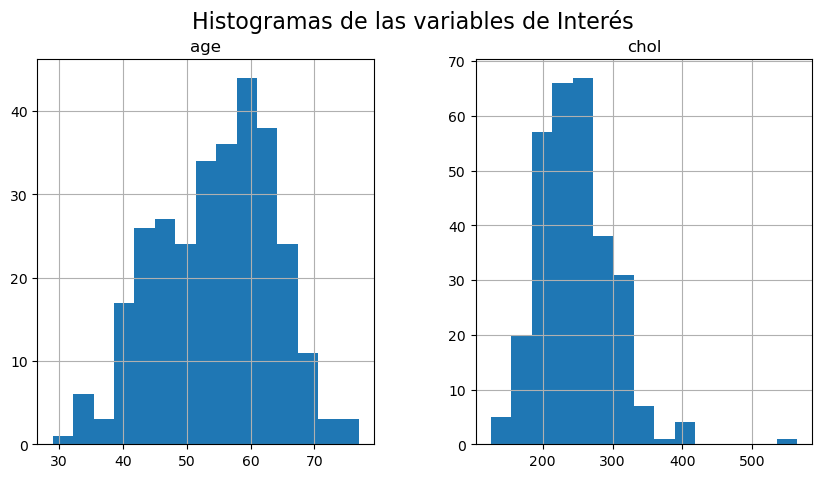

In [30]:
#Visualización: Histogramas de todas las variables numéricas (para las variables de interés) 
data[['age', 'chol']].hist(bins=15, figsize=(10,5)) #Cambia 'age' y 'chol" por las variables que quieras analizar 
plt.suptitle('Histogramas de las variables de Interés', fontsize=16) 
plt.show() 

Text(0.5, 0, 'Edad')

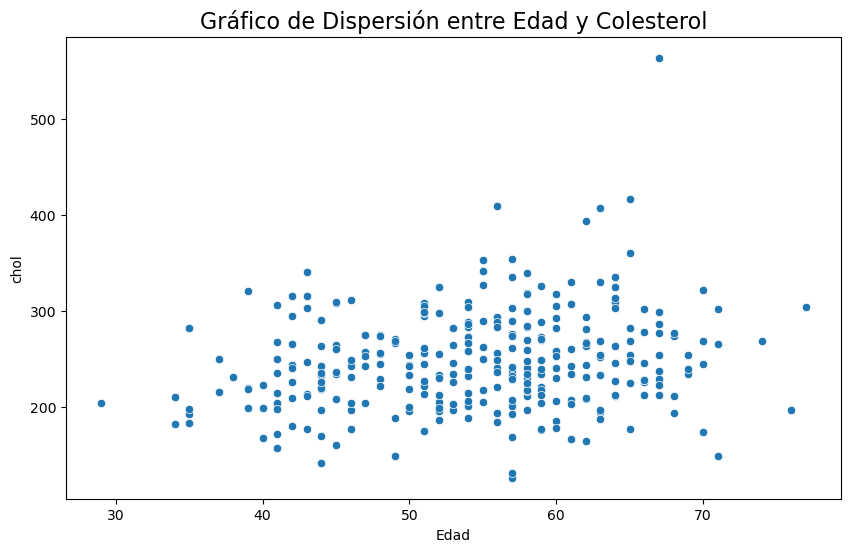

In [32]:
#Visualización: Gráfico de dispersión entre dos variables (por ejemplo: "age" y "chol") plt.figure(figsize-(10,6)) 
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='age', y='chol') # Cambia 'age' y 'chol por las variables que quieras analizar 
plt.title('Gráfico de Dispersión entre Edad y Colesterol', fontsize=16)
plt.xlabel('Edad')

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [38]:
#Comprobar si hay registros duplicados 
duplicates = data.duplicated().sum() 
print(f"Registros duplicados: {duplicates}") 

Registros duplicados: 0


In [42]:
#Eliminar duplicados si existen 
if duplicates > 0: 
    data = data.drop_duplicates() 

In [47]:
#Transformación de variables categóricas 
#Convertimos 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' a tipo 'category' 
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'] 
for col in categorical_columns:
    data[col] = data[col].astype('category') 

In [57]:
#Normalización/Estandarización de variables numéricas 
from sklearn.preprocessing import StandardScaler

In [61]:
#Seleccionamos las columnas numéricas 
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] 
scaler = StandardScaler() 

In [63]:
#Estandarizar las variables numéricas 
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [72]:
#Visualización de la transformación (opcional) 
print("\nDatos después del preprocesamiento:") 
print(data.describe())


Datos después del preprocesamiento:
                age      trestbps          chol       thalach     oldpeak  \
count  2.970000e+02  2.970000e+02  2.970000e+02  2.970000e+02  297.000000   
mean  -1.196200e-16  5.024040e-16 -1.973730e-16  5.024040e-16    0.000000   
std    1.001688e+00  1.001688e+00  1.001688e+00  1.001688e+00    1.001688   
min   -2.827176e+00 -2.125634e+00 -2.337704e+00 -3.431849e+00   -0.906712   
25%   -7.241238e-01 -6.594306e-01 -7.002541e-01 -7.247694e-01   -0.906712   
50%    1.613719e-01 -9.550637e-02 -8.380217e-02  1.484822e-01   -0.219520   
75%    7.148067e-01  4.684179e-01  5.519138e-01  7.160957e-01    0.467672   
max    2.485798e+00  3.851964e+00  6.099981e+00  2.287949e+00    4.419026   

        condition  
count  297.000000  
mean     0.461279  
std      0.499340  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  



## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


In [70]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 

In [76]:
#Separar las características (X) y la variable objetivo (y) 
X = data.drop('condition', axis=1) # Todas las columnas menos 'condition' 
Y = data['condition'] # Variable objetivo 

In [83]:
#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [89]:
#Crear el modelo de Random Forest 
model = RandomForestClassifier(random_state=42)

In [93]:
#Ajustar el modelo 
model.fit(X_train, Y_train) 

RandomForestClassifier(random_state=42)

In [99]:
#Obtener la importancia de las características 
importances = model.feature_importances_ 

In [105]:
#Crear un DataFrame para visualizar las importancias 
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

In [107]:
#Ordenar las características por su importancia 
feature_importances = feature_importances.sort_values(by='Importance', ascending=False) 

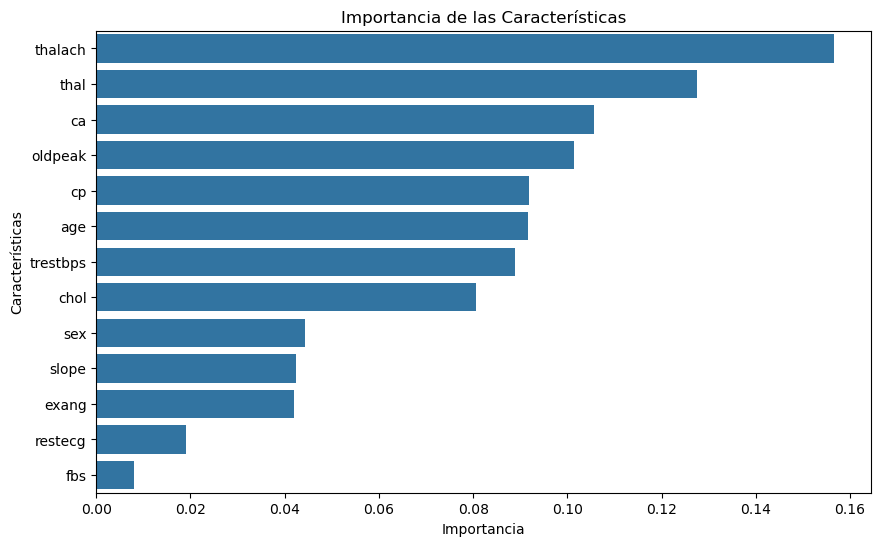

In [116]:
#Visualizar las importancias
plt.figure(figsize=(10, 6)) 
sns.barplot(x='Importance', y='Feature', data=feature_importances) 
plt.title('Importancia de las Características') 
plt.xlabel('Importancia') 
plt.ylabel('Características') 
plt.show()

## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [118]:
from sklearn.model_selection import train_test_split 

In [122]:
#Separar las características (X) y la variable objetivo (y) 
X = data.drop('condition', axis=1) #Todas las columnas menos 'condition' 
Y = data ['condition'] #Variable objetivo 

In [128]:
#Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

In [130]:
#Mostrar la forma de los conjuntos de datos resultantes 
print("Tamaño del conjunto de entrenamiento:", X_train.shape) 
print("Tamaño del conjunto de prueba:", X_test.shape) 

Tamaño del conjunto de entrenamiento: (237, 13)
Tamaño del conjunto de prueba: (60, 13)


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [132]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, accuracy_score 

In [134]:
#Crear una instancia del modelo de Regresión Logística 
Model = LogisticRegression(max_iter=1000, random_state=42, solver='liblinear') 

In [136]:
#Ajustar el modelo a los datos de entrenamiento 
model.fit(X_train, Y_train) 

RandomForestClassifier(random_state=42)

In [142]:
#Predecir las etiquetas para el conjunto de prueba 
Y_pred = model.predict(X_test) 

In [144]:
#Evaluar el rendimiento del modelo 
accuracy = accuracy_score(Y_test, Y_pred) 
report = classification_report(Y_test, Y_pred) 

In [146]:
print("Precisión del modelo:", accuracy) 
print("\nInforme de clasificación: \n", report)

Precisión del modelo: 0.7

Informe de clasificación: 
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [148]:
from sklearn.metrics import classification_report, accuracy_score 

In [150]:
#Predicciones en el conjunto de prueba 
Y_pred = model.predict(X_test) 

In [152]:
# Calcular la precisión del modelo 
accuracy = accuracy_score (Y_test, Y_pred) 
print("Precisión del modelo:", accuracy) 

Precisión del modelo: 0.7


In [154]:
# Informe de clasificación 
report = classification_report (Y_test, Y_pred) 
print("Informe de clasificación:\n", report)

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score 
import matplotlib.pyplot as plt 
import seaborn as sns 

<Figure size 800x600 with 0 Axes>

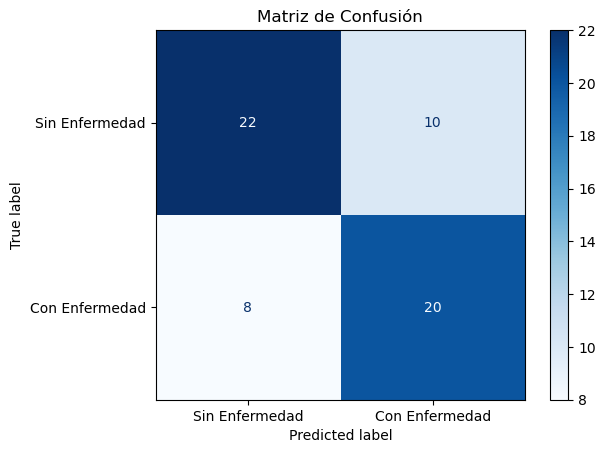

In [185]:
#1. Matriz de Confusión 
Y_pred = model.predict (X_test) # Realizamos predicciones en el conjunto de prueba 
cm = confusion_matrix(Y_test, Y_pred) 

plt.figure(figsize=(8, 6)) 
ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=['Sin Enfermedad', 'Con Enfermedad']).plot(cmap='Blues') 
plt.title('Matriz de Confusión')
plt.show() 

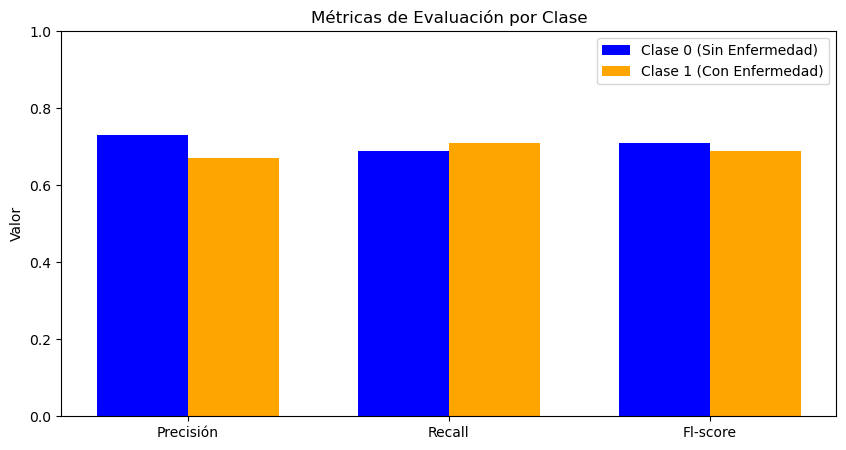

In [195]:
#2. Gráfico de barras para las métricas de evaluación 
metrics = ['Precisión', 'Recall', 'Fl-score'] 
values_0 = [0.73, 0.69, 0.71] # Promedio de las métricas para la clase 0
values_1 = [0.67, 0.71, 0.69] # Promedio de las métricas para la clase 1 
bar_width = 0.35 
x = np.arange (len (metrics)) # El eje x 
plt.figure(figsize=(10,5)) 
plt.bar (x - bar_width/2, values_0, bar_width, label='Clase 0 (Sin Enfermedad)', color='blue') 
plt.bar (x + bar_width/2, values_1, bar_width, label='Clase 1 (Con Enfermedad)', color='orange') 
plt.xticks (x, metrics) 
plt.ylim (0, 1) 
plt.ylabel('Valor') 
plt.title('Métricas de Evaluación por Clase') 
plt.legend () 
plt.show()

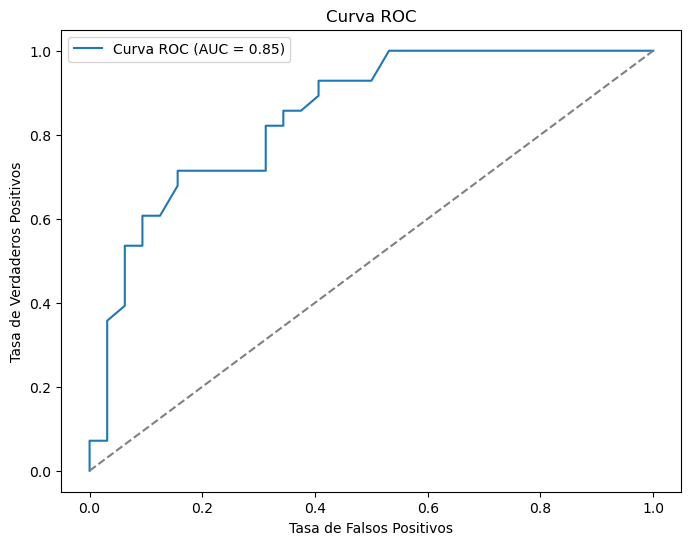

In [197]:
#3. Curva ROC
Y_pred_proba = model.predict_proba (X_test) [:, 1] # Obtener las probabilidades de la clase positiva 
fpr, tpr, thresholds = roc_curve (Y_test, Y_pred_proba) 
roc_auc = roc_auc_score (Y_test, Y_pred_proba) 
plt.figure(figsize=(8,6)) 
plt.plot(fpr, tpr, label='Curva ROC (AUC = {:.2f})'.format(roc_auc)) 
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlabel('Tasa de Falsos Positivos') 
plt.ylabel('Tasa de Verdaderos Positivos') 
plt.title('Curva ROC') 
plt.legend () 
plt.show() 

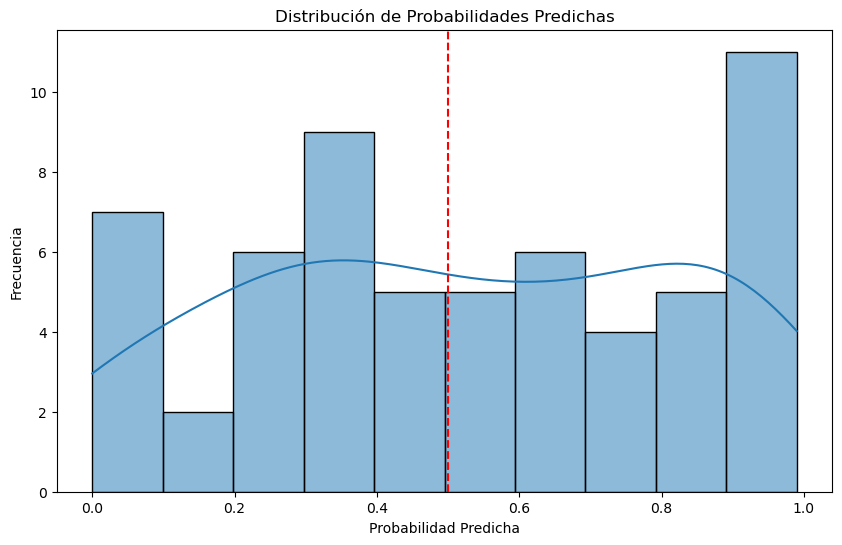

In [199]:
#4. Gráfico de distribución de probabilidades 
plt.figure(figsize=(10, 6)) 
sns.histplot (Y_pred_proba, bins=10, kde=True) 
plt.axvline (0.5, color='red', linestyle='--') # Umbral de decisión
plt.xlabel('Probabilidad Predicha') 
plt.ylabel('Frecuencia')
plt.title('Distribución de Probabilidades Predichas') 
plt.show()